# 🚀 Flujo Completo: Dataset → Entrenamiento → Clasificación

Este notebook integra los 3 módulos principales del proyecto:
1. **GeneradorDataset**: Genera datos de letras con distorsión
2. **MLP**: Red neuronal que aprende a clasificar
3. **ClasificadorLetras**: Interfaz para usar y evaluar el modelo

## 📦 Paso 1: Importar Librerías y Módulos

---
⚠️ **IMPORTANTE**: Este notebook debe ejecutarse **EN ORDEN** celda por celda.
- Puedes usar **"Run All"** (Ctrl+Shift+Alt+Enter) para ejecutar todas las celdas
- O ejecutar celda por celda con **Shift+Enter**

**NO saltes pasos**, especialmente el **Paso 8: Entrenar** que es crítico.

---

In [34]:
# Librerías estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Módulos del proyecto
from generador_dataset import GeneradorDataset
from mlp import MLP
from clasificador import ClasificadorLetras

print("✅ Librerías y módulos importados correctamente")

✅ Librerías y módulos importados correctamente


---
# 🏭 PARTE 1: Generación de Datos

Generamos un dataset de 500 ejemplos con distorsiones específicas.

## 🎯 Paso 2: Crear el Generador

In [39]:
generador = GeneradorDataset()
print(f"✅ GeneradorDataset creado")
print(f"   Letras: {generador.letras}")

✅ GeneradorDataset creado
   Letras: ['B', 'D', 'F']


## ⚙️ Configuración: Seleccionar cantidad de ejemplos

In [42]:
# ========================================
# CONFIGURACIÓN DEL PROYECTO
# ========================================

print("="*70)
print("⚙️  CONFIGURACIÓN DEL ENTRENAMIENTO")
print("="*70)

# Opción 1: Modo interactivo (pide input al usuario)
MODO_INTERACTIVO = False  # Cambiar a True si quieres elegir interactivamente

if MODO_INTERACTIVO:
    print("\n📊 Cantidad de ejemplos disponibles:")
    print("   1️⃣  100 ejemplos  (rápido, pruebas)")
    print("   2️⃣  500 ejemplos  (equilibrado, recomendado)")
    print("   3️⃣  1000 ejemplos (completo, más tiempo)")
    
    opcion = input("\n¿Qué cantidad deseas usar? (1/2/3) [default=2]: ").strip()
    
    if opcion == "1":
        cantidad = 100
    elif opcion == "3":
        cantidad = 1000
    else:
        cantidad = 500  # Por defecto
else:
    # Modo automático (sin input)
    cantidad = 100  # Cambiar aquí para usar otra cantidad por defecto

print(f"\n✅ Configuración seleccionada:")
print(f"   📦 Cantidad de ejemplos: {cantidad}")
print("="*70)

⚙️  CONFIGURACIÓN DEL ENTRENAMIENTO

✅ Configuración seleccionada:
   📦 Cantidad de ejemplos: 100


**Nota**: Puedes cambiar `MODO_INTERACTIVO = False` si quieres ejecutar el notebook sin pausas para input.

## 📊 Paso 3: Generar Datasets

In [46]:
# Configurar porcentaje de distorsión (ya tenemos 'cantidad' definida arriba)
distorsion = 10  # Porcentaje de distorsión (1-30)

print(f"🎯 Generando {cantidad} ejemplos con {distorsion}% de distorsión")
print("="*60)

# Generar originales
generador.generar_data_letras(cantidad)

# Generar distorsionados
generador.generar_data_con_distorsiones_especificas(
    cant=cantidad,
    distorsion=distorsion,  # Ahora es un solo número
    mezclar=False
)

print("="*60)
print("✅ Datasets generados!")

🎯 Generando 100 ejemplos con 10% de distorsión
✅ Dataset original de 100 ejemplos guardado en: C:\Leo\Inteligencia Artificial\perceptron2\data\originales\100\letras.csv
   📌 Datos en orden (sin mezclar) para comparación
✅ Dataset con distorsión de 10% guardado en: C:\Leo\Inteligencia Artificial\perceptron2\data\distorsionadas\100\letras.csv
   - Total ejemplos: 100
   - Distorsión aplicada: 10%
✅ Datasets generados!


## 📂 Paso 4: Cargar los Datos

In [49]:
def leer_dataset(cantidad, tipo='originales'):
    file_path = os.path.join('data', tipo, str(cantidad), 'letras.csv')
    df = pd.read_csv(file_path, sep=';', header=None)
    X = df.iloc[:, :100].values
    y = df.iloc[:, 100:].values
    return X, y

X_orig, y_orig = leer_dataset(cantidad, 'originales')
X_dist, y_dist = leer_dataset(cantidad, 'distorsionadas')

# Diccionario para mapear índices a letras
letras_map = {0: 'B', 1: 'D', 2: 'F'}

print(f"✅ Datos cargados: {len(X_dist)} ejemplos")

✅ Datos cargados: 100 ejemplos


## 🔍 Paso 5: Visualizar Ejemplos

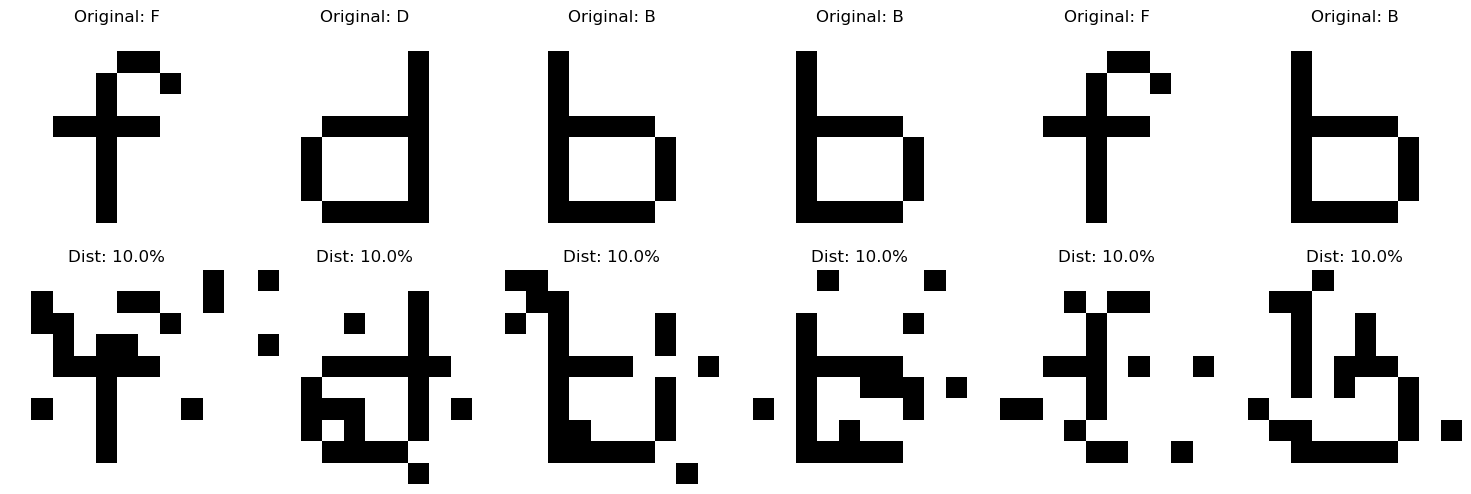

In [52]:
fig, axes = plt.subplots(2, 6, figsize=(15, 5))

for i in range(6):
    letra = letras_map[np.argmax(y_orig[i])]
    
    axes[0, i].imshow(X_orig[i].reshape(10, 10), cmap='binary')
    axes[0, i].set_title(f'Original: {letra}')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(X_dist[i].reshape(10, 10), cmap='binary')
    dist = np.sum(X_dist[i] != X_orig[i]) / 100 * 100
    axes[1, i].set_title(f'Dist: {dist:.1f}%')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

---
# 🧠 PARTE 2: Entrenamiento del MLP

## 🔄 Paso 6: Preparar Datos

## 🏗️ Paso 7: Crear MLP

### 🆕 Nueva API disponible!

Ahora puedes crear el MLP de **3 formas diferentes**:

**Opción 1 - API Clásica (retrocompatible):**
```python
MLP(capas_ocultas=[10], learning_rate=0.1, momentum=0.9)
```

**Opción 2 - API Nueva (1 capa oculta):**
```python
MLP(capas_ocultas=1, cantidad_neuronas=8, learning_rate=0.4, momentum=0.6)
```

**Opción 3 - API Nueva (2 capas ocultas):**
```python
MLP(capas_ocultas=2, cantidad_neuronas1=8, cantidad_neuronas2=6, 
    learning_rate=0.2, momentum=0.3)
```

💡 **Restricciones**: 
- `cantidad_neuronas` debe estar entre **5 y 10**
- `learning_rate` entre **0 y 1**
- `momentum` entre **0 y 1**

In [59]:
# ========================================
# OPCIÓN 1: API Clásica (lista)
# ========================================
# mlp = MLP(
#     capas_ocultas=[10],  # 1 capa oculta con 10 neuronas
#     learning_rate=0.1,
#     momentum=0.9
# )

# ========================================
# OPCIÓN 2: API Nueva - 1 capa oculta
# ========================================
#mlp = MLP(
#    capas_ocultas=1,
#    cantidad_neuronas=8,  # 5-10 neuronas
#    learning_rate=0.4,
#    momentum=0.6
#)

# ========================================
# OPCIÓN 3: API Nueva - 2 capas ocultas
# ========================================
# mlp = MLP(
#     capas_ocultas=2,
#     cantidad_neuronas1=8,   # 5-10 neuronas en capa 1
#     cantidad_neuronas2=6,   # 5-10 neuronas en capa 2
#     learning_rate=0.2,
#     momentum=0.3
# )

print("✅ MLP creado con tu nueva API")
print(f"   Arquitectura: 100 → {' → '.join(map(str, mlp.capas_ocultas))} → 3")
print("   Activaciones: Lineal (oculta) | Sigmoidal (salida)")

✅ MLP creado con tu nueva API


NameError: name 'mlp' is not defined

---
# 🔬 PARTE 2B: Entrenamiento con Validación

Vamos a entrenar el MLP usando **validación** para detectar overfitting.

### ¿Qué es validación?
- **Conjunto de entrenamiento**: Datos que el modelo usa para aprender
- **Conjunto de validación**: Datos que el modelo **NO ve** durante el entrenamiento
- Se evalúa en ambos conjuntos para detectar si el modelo **memoriza** (overfitting) o **aprende** (generalización)

### ¿Qué es overfitting?
- El modelo se ajusta **demasiado** a los datos de entrenamiento
- Funciona muy bien en entrenamiento pero **mal** en validación
- Señal: Gap grande entre error de entrenamiento y validación

## 🔀 Paso 8B: Dividir datos en Train/Validación

In [63]:
from sklearn.model_selection import train_test_split

# Configurar split de validación
porcentaje_validacion = 0.20  # 20% para validación, 80% para entrenamiento

# Dividir datos manteniendo proporción de clases (estratificación)
X_train, X_val, y_train, y_val = train_test_split(
    X_dist, y_dist,
    test_size=porcentaje_validacion,
    random_state=42,  # Para reproducibilidad
    stratify=np.argmax(y_dist, axis=1)  # Mantener proporción B/D/F
)

# Mezclar solo el conjunto de entrenamiento
indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

print(f"✅ Datos divididos:")
print(f"   - Total:         {len(X_dist)} ejemplos")
print(f"   - Entrenamiento: {len(X_train)} ejemplos ({(1-porcentaje_validacion)*100:.0f}%)")
print(f"   - Validación:    {len(X_val)} ejemplos ({porcentaje_validacion*100:.0f}%)")
print(f"\n📊 Distribución por letra en validación:")
for i, letra in enumerate(['B', 'D', 'F']):
    count = np.sum(np.argmax(y_val, axis=1) == i)
    print(f"   - {letra}: {count} ejemplos")

✅ Datos divididos:
   - Total:         100 ejemplos
   - Entrenamiento: 80 ejemplos (80%)
   - Validación:    20 ejemplos (20%)

📊 Distribución por letra en validación:
   - B: 7 ejemplos
   - D: 7 ejemplos
   - F: 6 ejemplos


## 🎯 Paso 9: Entrenar MLP CON Validación

In [75]:
# Crear MLP con la NUEVA API (1 capa oculta)
mlp_validacion = MLP(
    capas_ocultas=2,
    cantidad_neuronas1=6,
    cantidad_neuronas2=6,
    learning_rate=0.4,
    momentum=0.6,
    epochs=1000
)

print(f"🏗️  Arquitectura: {mlp_validacion.arquitectura}")
print(f"\n🏃 Entrenando con validación...\n")

# Entrenar CON datos de validación
historial = mlp_validacion.entrenar(
    X_train, y_train,              # Datos de entrenamiento
    X_val=X_val, y_val=y_val,      # ← NUEVO: datos de validación
    
    verbose=True  # Mostrará ambos errores época por época
)

print(f"\n✅ Entrenamiento completado!")
print(f"   - Error train (inicial): {historial['train_loss'][0]:.6f}")
print(f"   - Error train (final):   {historial['train_loss'][-1]:.6f}")
print(f"   - Error val (inicial):   {historial['val_loss'][0]:.6f}")
print(f"   - Error val (final):     {historial['val_loss'][-1]:.6f}")
print(f"   - Gap final:             {historial['val_loss'][-1] - historial['train_loss'][-1]:.6f}")

✅ MLP creado con arquitectura: [100, 6, 6, 3]
   Capas ocultas: [6, 6] (activación LINEAL)
   Capa de salida: 3 neuronas (activación SIGMOIDAL)
   Learning rate: 0.4, Momentum: 0.6, Épocas: 1000
🏗️  Arquitectura: [100, 6, 6, 3]

🏃 Entrenando con validación...

Época 1/1000 - Error Entrenamiento (MSE): 0.312195 - Error Validación (MSE): 0.214947
Época 2/1000 - Error Entrenamiento (MSE): 0.220501 - Error Validación (MSE): 0.186859
Época 3/1000 - Error Entrenamiento (MSE): 0.187106 - Error Validación (MSE): 0.174872
Época 4/1000 - Error Entrenamiento (MSE): 0.171540 - Error Validación (MSE): 0.151348
Época 5/1000 - Error Entrenamiento (MSE): 0.144969 - Error Validación (MSE): 0.128240
Época 6/1000 - Error Entrenamiento (MSE): 0.120465 - Error Validación (MSE): 0.111095
Época 7/1000 - Error Entrenamiento (MSE): 0.102494 - Error Validación (MSE): 0.098998
Época 8/1000 - Error Entrenamiento (MSE): 0.087836 - Error Validación (MSE): 0.091030
Época 9/1000 - Error Entrenamiento (MSE): 0.076217 

## 📊 Paso 10: Graficar MSE de Entrenamiento vs Validación

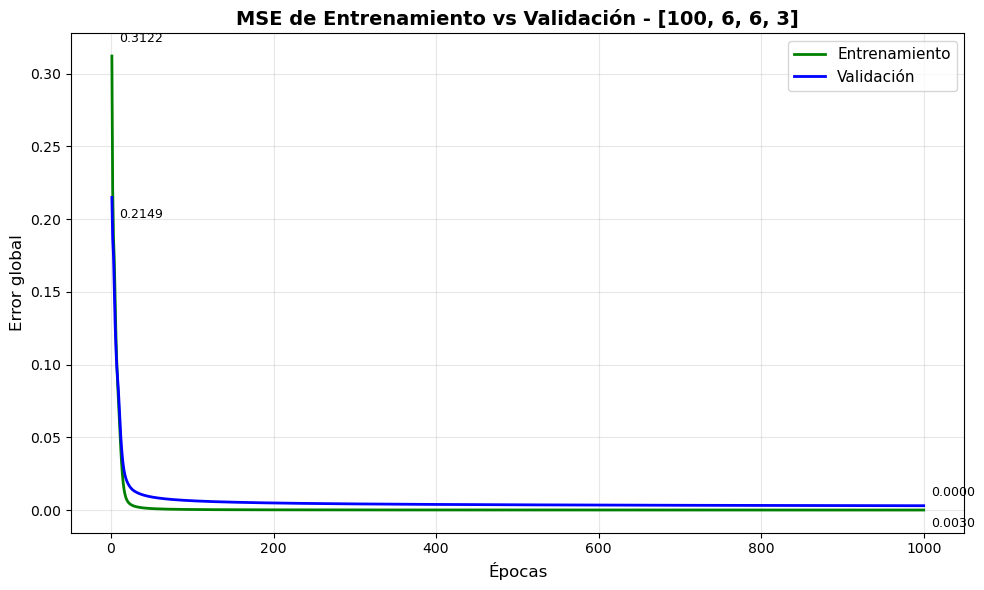

In [78]:
from visualizador import graficar_mse_entrenamiento_validacion, imprimir_resumen_entrenamiento

# Graficar las curvas MSE
graficar_mse_entrenamiento_validacion(
    historial,
    titulo=f"MSE de Entrenamiento vs Validación - {mlp_validacion.arquitectura}"
)

## 🔍 Paso 11: Análisis de Overfitting

In [30]:
# Imprimir resumen completo con análisis
imprimir_resumen_entrenamiento(historial)


📊 RESUMEN DEL ENTRENAMIENTO

📉 Error Entrenamiento:
   - Inicial: 0.177279
   - Final:   0.002901
   - Mejora:  98.36%

📉 Error Validación:
   - Inicial: 0.156561
   - Final:   0.005044
   - Mejora:  96.78%

🎯 Análisis:
   - Gap (val - train): 0.002142
   - Estado: ✅ BUEN BALANCE
   - Balance saludable entre entrenamiento y validación



## 📈 Paso 12: Evaluar en Entrenamiento y Validación

In [32]:
clasificador_val = ClasificadorLetras(mlp_validacion)
letras_map = {0: 'B', 1: 'D', 2: 'F'}

# Evaluar en ENTRENAMIENTO
print("🔹 Evaluación en conjunto de ENTRENAMIENTO:")
aciertos_train = 0
for i in range(len(X_train)):
    resultado = clasificador_val.clasificar_patron(X_train[i])
    real = letras_map[np.argmax(y_train[i])]
    if resultado['letra'] == real:
        aciertos_train += 1

precision_train = (aciertos_train / len(X_train)) * 100
print(f"   Precisión: {precision_train:.2f}% ({aciertos_train}/{len(X_train)})")

# Evaluar en VALIDACIÓN
print("\n🔹 Evaluación en conjunto de VALIDACIÓN:")
aciertos_val = 0
for i in range(len(X_val)):
    resultado = clasificador_val.clasificar_patron(X_val[i])
    real = letras_map[np.argmax(y_val[i])]
    if resultado['letra'] == real:
        aciertos_val += 1

precision_val = (aciertos_val / len(X_val)) * 100
print(f"   Precisión: {precision_val:.2f}% ({aciertos_val}/{len(X_val)})")

# Análisis
print(f"\n📈 ANÁLISIS:")
print(f"   Diferencia: {abs(precision_train - precision_val):.2f}%")
if precision_train - precision_val > 10:
    print(f"   ⚠️  Posible overfitting (modelo memoriza en lugar de aprender)")
elif precision_val > precision_train:
    print(f"   ✅ Excelente! El modelo generaliza bien")
else:
    print(f"   ✅ Buen balance entre entrenamiento y validación")

🔹 Evaluación en conjunto de ENTRENAMIENTO:
   Precisión: 100.00% (400/400)

🔹 Evaluación en conjunto de VALIDACIÓN:
   Precisión: 100.00% (100/100)

📈 ANÁLISIS:
   Diferencia: 0.00%
   ✅ Buen balance entre entrenamiento y validación


---
# 🧪 EXPERIMENTO: Comparar diferentes splits de validación

Ahora vamos a probar con **3 splits diferentes** (10%, 20%, 30%) para comparar resultados.

## 🔬 Paso 13: Comparar Splits (10%, 20%, 30%)

In [35]:
from visualizador import graficar_comparacion_splits

# Diccionario para guardar resultados
resultados_splits = {}

# Probar con 3 splits diferentes
splits = [0.10, 0.20, 0.30]

for split in splits:
    print(f"\n{'='*70}")
    print(f"🔀 Entrenando con {int(split*100)}% validación...")
    print('='*70)
    
    # Dividir datos
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_dist, y_dist,
        test_size=split,
        random_state=42,
        stratify=np.argmax(y_dist, axis=1)
    )
    
    print(f"   Train: {len(X_train_split)} | Val: {len(X_val_split)}")
    
    # Crear y entrenar MLP
    mlp_split = MLP(
        capas_ocultas=1,
        cantidad_neuronas=8,
        learning_rate=0.4,
        momentum=0.6
    )
    
    # Entrenar (sin verbose para no saturar output)
    historial_split = mlp_split.entrenar(
        X_train_split, y_train_split,
        X_val=X_val_split, y_val=y_val_split,
        epochs=50,
        verbose=False  # Silencioso para no saturar
    )
    
    # Guardar resultados
    resultados_splits[f'{int(split*100)}%'] = historial_split
    
    # Imprimir resumen
    print(f"   Error train final: {historial_split['train_loss'][-1]:.6f}")
    print(f"   Error val final:   {historial_split['val_loss'][-1]:.6f}")
    print(f"   Gap:               {historial_split['val_loss'][-1] - historial_split['train_loss'][-1]:.6f}")

print(f"\n✅ Experimento completado con {len(splits)} splits diferentes!")


🔀 Entrenando con 10% validación...
   Train: 450 | Val: 50
✅ MLP creado con arquitectura: [100, 8, 3]
   Capas ocultas: [8] (activación LINEAL)
   Capa de salida: 3 neuronas (activación SIGMOIDAL)
   Learning rate: 0.4, Momentum: 0.6
   Error train final: 0.002882
   Error val final:   0.006951
   Gap:               0.004068

🔀 Entrenando con 20% validación...
   Train: 400 | Val: 100
✅ MLP creado con arquitectura: [100, 8, 3]
   Capas ocultas: [8] (activación LINEAL)
   Capa de salida: 3 neuronas (activación SIGMOIDAL)
   Learning rate: 0.4, Momentum: 0.6
   Error train final: 0.002901
   Error val final:   0.005044
   Gap:               0.002142

🔀 Entrenando con 30% validación...
   Train: 350 | Val: 150
✅ MLP creado con arquitectura: [100, 8, 3]
   Capas ocultas: [8] (activación LINEAL)
   Capa de salida: 3 neuronas (activación SIGMOIDAL)
   Learning rate: 0.4, Momentum: 0.6
   Error train final: 0.002901
   Error val final:   0.004083
   Gap:               0.001182

✅ Experimento

## 📊 Paso 14: Visualizar Comparación de Splits

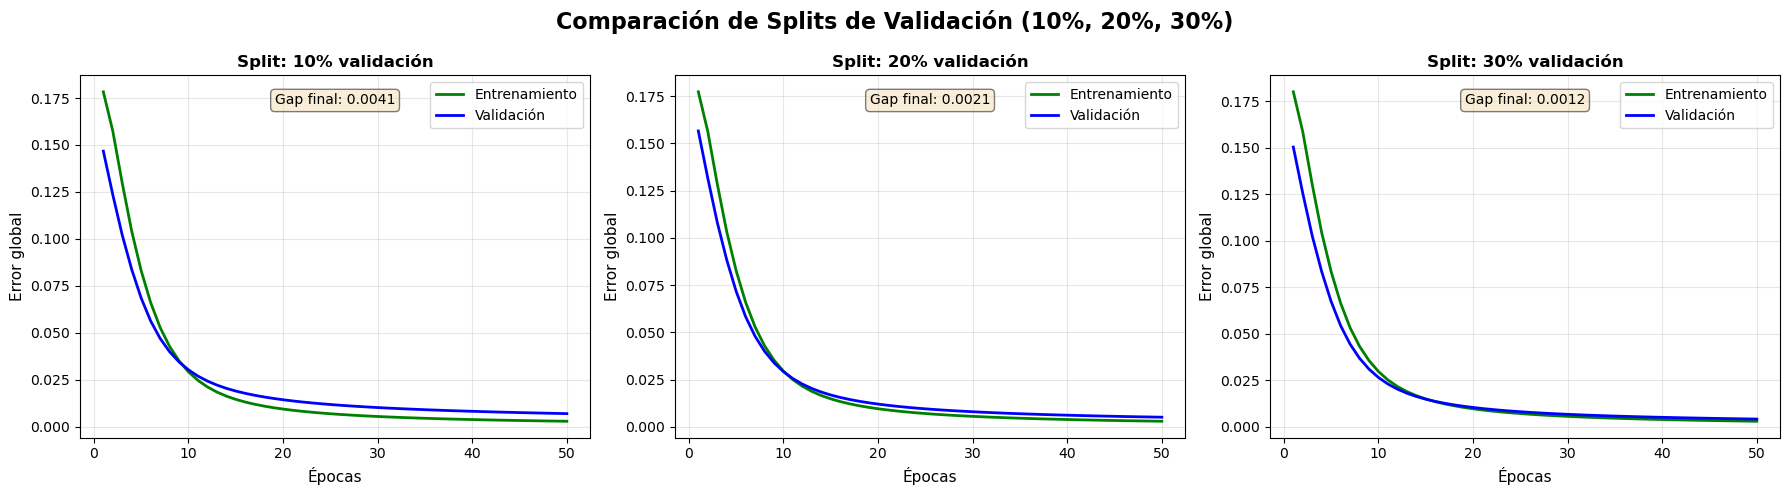

In [37]:
# Graficar las 3 comparaciones lado a lado
graficar_comparacion_splits(
    resultados_splits,
    titulo="Comparación de Splits de Validación (10%, 20%, 30%)"
)

## 🎯 Paso 8: Entrenar

### 📝 Mejoras Implementadas en el MLP:

**1. API Simplificada:**
- Solo especificas capas ocultas: `MLP(capas_ocultas=[10])`
- Activaciones fijas: Lineal en ocultas, Sigmoidal en salida

**2. Funciones Optimizadas:**
- `backward_propagation()`: Calcula deltas con derivadas correctas
- `gradiente_descendente()`: Usa operaciones vectorizadas (100x más rápido)
- Implementación correcta del momento

**3. Monitoreo Mejorado:**
- Muestra **todas** las épocas (no cada 100)
- Numeración desde 1 (más intuitivo)

In [40]:
print("🎯 Entrenando...")
print("="*60)

historial = mlp.entrenar(X_train, y_train, epochs=100, verbose=True)

print("="*60)
print(f"✅ Entrenamiento completado!")
print(f"   Error final: {historial[-1]:.6f}")

🎯 Entrenando...
Época 1/100 - Error (MSE): 0.177279
Época 2/100 - Error (MSE): 0.156280
Época 3/100 - Error (MSE): 0.128619
Época 4/100 - Error (MSE): 0.103307
Época 5/100 - Error (MSE): 0.082577
Época 6/100 - Error (MSE): 0.065879
Época 7/100 - Error (MSE): 0.052812
Época 8/100 - Error (MSE): 0.042849
Época 9/100 - Error (MSE): 0.035248
Época 10/100 - Error (MSE): 0.029406
Época 11/100 - Error (MSE): 0.024907
Época 12/100 - Error (MSE): 0.021424
Época 13/100 - Error (MSE): 0.018694
Época 14/100 - Error (MSE): 0.016520
Época 15/100 - Error (MSE): 0.014762
Época 16/100 - Error (MSE): 0.013321
Época 17/100 - Error (MSE): 0.012125
Época 18/100 - Error (MSE): 0.011118
Época 19/100 - Error (MSE): 0.010261
Época 20/100 - Error (MSE): 0.009524
Época 21/100 - Error (MSE): 0.008882
Época 22/100 - Error (MSE): 0.008320
Época 23/100 - Error (MSE): 0.007823
Época 24/100 - Error (MSE): 0.007381
Época 25/100 - Error (MSE): 0.006984
Época 26/100 - Error (MSE): 0.006627
Época 27/100 - Error (MSE): 0.0

## 📈 Paso 9: Curva de Aprendizaje

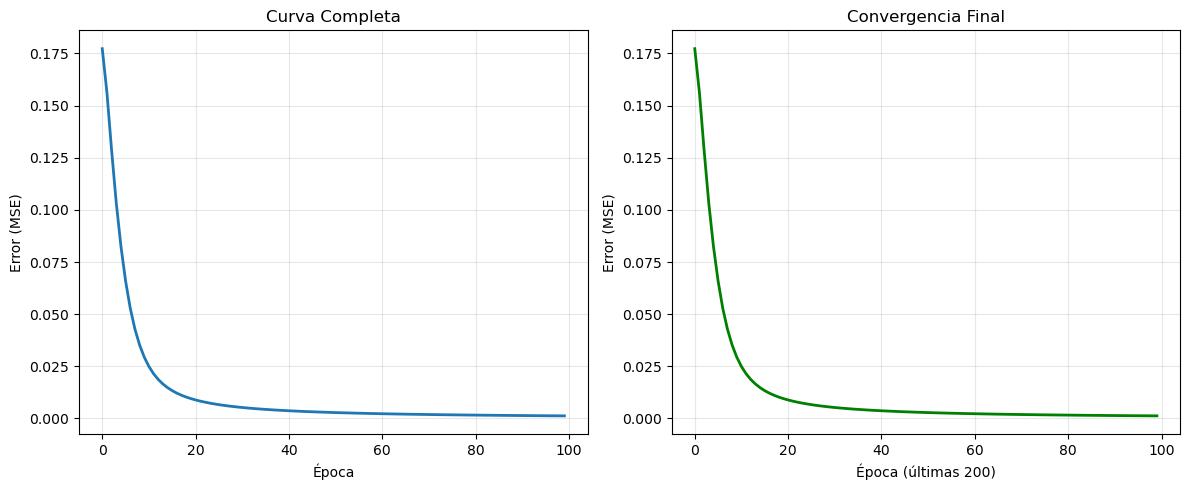

In [42]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(historial, linewidth=2)
plt.xlabel('Época')
plt.ylabel('Error (MSE)')
plt.title('Curva Completa')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(historial[-200:], linewidth=2, color='green')
plt.xlabel('Época (últimas 200)')
plt.ylabel('Error (MSE)')
plt.title('Convergencia Final')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# 🎛️ PARTE 3: Clasificación y Evaluación

## 🎨 Paso 10: Crear Clasificador

In [45]:
clasificador = ClasificadorLetras(mlp)
print("✅ Clasificador creado")

✅ Clasificador creado


## 🧪 Paso 11: Evaluar Precisión

In [47]:
aciertos = 0
for i in range(len(X_dist)):
    resultado = clasificador.clasificar_patron(X_dist[i])
    pred = resultado['letra']
    real = letras_map[np.argmax(y_dist[i])]
    if pred == real:
        aciertos += 1

precision = (aciertos / len(X_dist)) * 100
print(f"✅ Precisión: {precision:.2f}%")
print(f"   Aciertos: {aciertos}/{len(X_dist)}")

✅ Precisión: 100.00%
   Aciertos: 500/500


## 🔍 Paso 12: Visualizar Predicciones

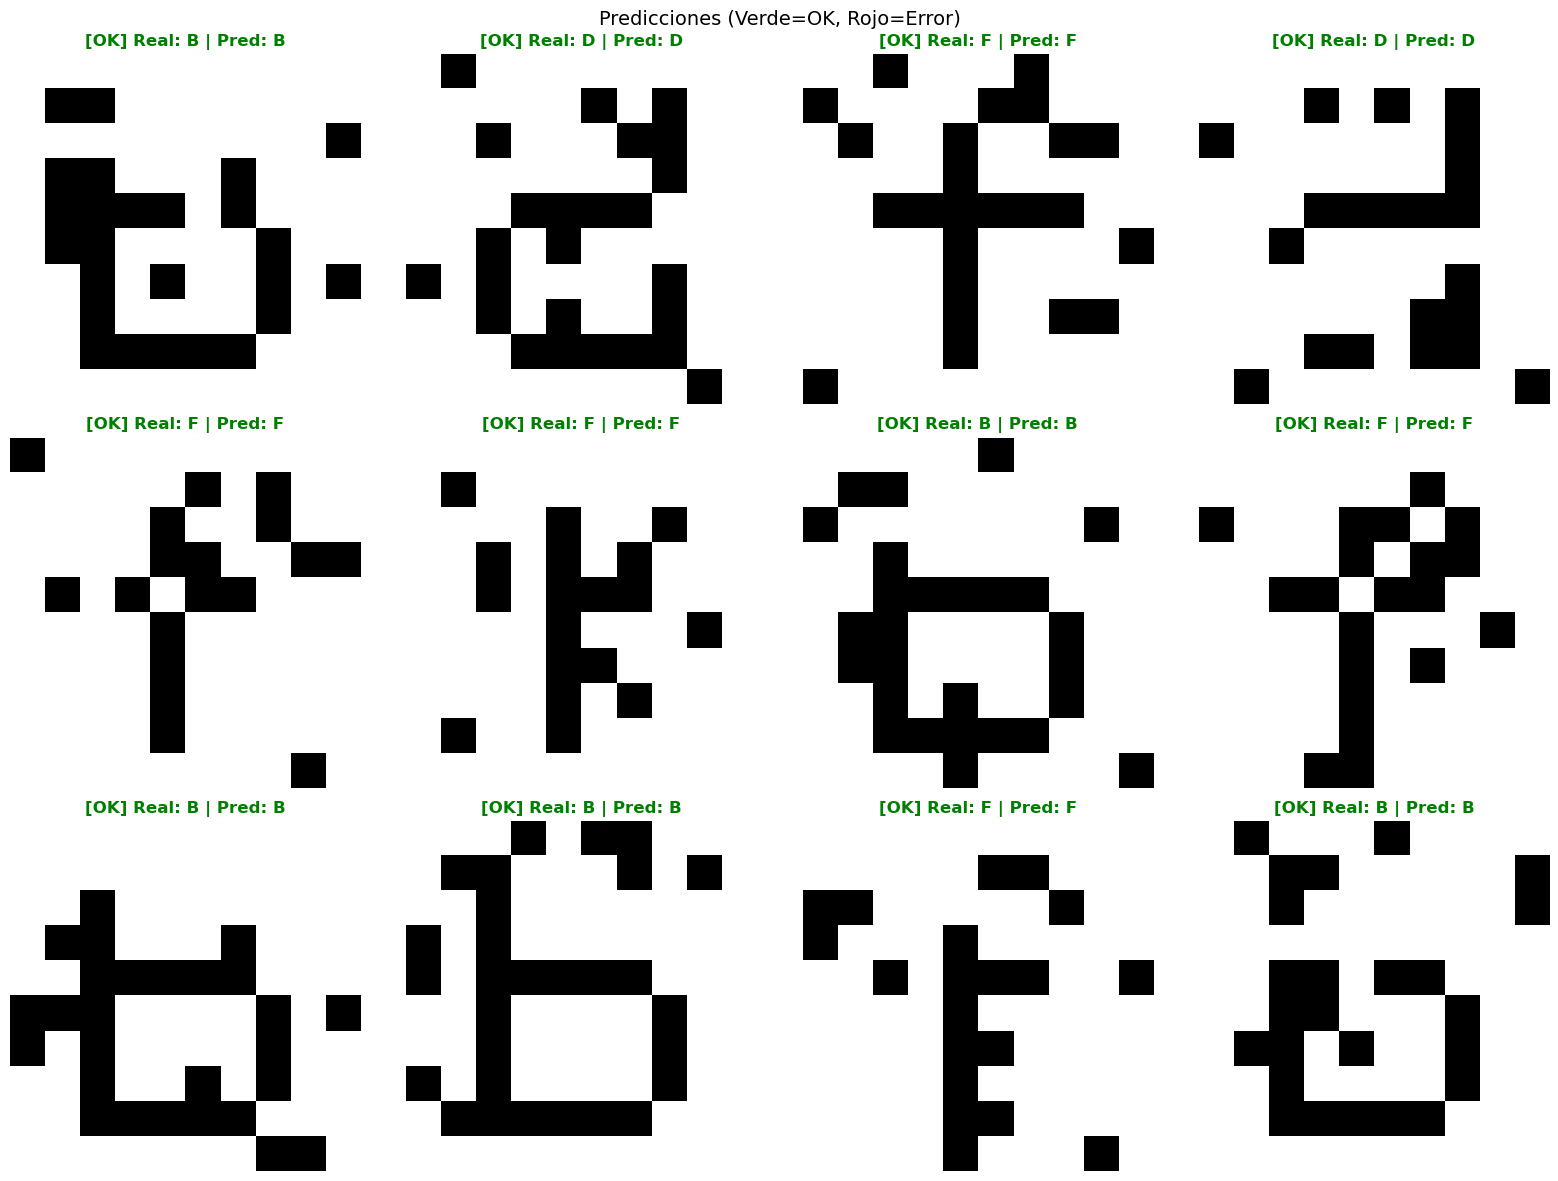

In [49]:
indices_random = np.random.choice(len(X_dist), 12, replace=False)
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, i in enumerate(indices_random):
    resultado = clasificador.clasificar_patron(X_dist[i])
    pred = resultado['letra']
    real = letras_map[np.argmax(y_dist[i])]
    correcto = "[OK]" if pred == real else "[ERROR]"
    color = 'green' if pred == real else 'red'
    
    axes[idx].imshow(X_dist[i].reshape(10, 10), cmap='binary')
    axes[idx].set_title(f'{correcto} Real: {real} | Pred: {pred}', 
                        color=color, fontweight='bold')
    axes[idx].axis('off')

plt.suptitle('Predicciones (Verde=OK, Rojo=Error)', fontsize=14)
plt.tight_layout()
plt.show()

## 🎯 Paso 13: Probar Robustez

In [51]:
print("🧪 Probando robustez...")
print("="*60)

for letra in ['B', 'D', 'F']:
    print(f"\n📝 Letra {letra}:")
    clasificador.probar_distorsiones(
        letra=letra,
        distorsiones=[0, 5, 10, 15, 20, 25, 30]
    )

print("\n" + "="*60)

🧪 Probando robustez...

📝 Letra B:

🔍 Probando clasificación de letra 'B' con diferentes distorsiones:
✅ Distorsión  0% → Predicción: B (Confianza: 99.7%)
✅ Distorsión  5% → Predicción: B (Confianza: 99.7%)
✅ Distorsión 10% → Predicción: B (Confianza: 99.8%)
✅ Distorsión 15% → Predicción: B (Confianza: 67.7%)
✅ Distorsión 20% → Predicción: B (Confianza: 90.2%)
✅ Distorsión 25% → Predicción: B (Confianza: 91.5%)
❌ Distorsión 30% → Predicción: D (Confianza: 88.3%)

📝 Letra D:

🔍 Probando clasificación de letra 'D' con diferentes distorsiones:
✅ Distorsión  0% → Predicción: D (Confianza: 99.7%)
✅ Distorsión  5% → Predicción: D (Confianza: 99.7%)
✅ Distorsión 10% → Predicción: D (Confianza: 99.4%)
✅ Distorsión 15% → Predicción: D (Confianza: 98.6%)
✅ Distorsión 20% → Predicción: D (Confianza: 99.6%)
✅ Distorsión 25% → Predicción: D (Confianza: 94.8%)
❌ Distorsión 30% → Predicción: F (Confianza: 29.7%)

📝 Letra F:

🔍 Probando clasificación de letra 'F' con diferentes distorsiones:
✅ Distors

## 📈 Paso 14: Gráfica de Robustez

In [53]:
resultados = clasificador.evaluar_robustez(
    distorsiones=[0, 5, 10, 15, 20, 25, 30],
    num_pruebas_por_letra=50
)

plt.figure(figsize=(12, 7))
plt.plot(resultados['distorsiones'], resultados['precision_B'], 'o-', label='B', linewidth=2)
plt.plot(resultados['distorsiones'], resultados['precision_D'], 's-', label='D', linewidth=2)
plt.plot(resultados['distorsiones'], resultados['precision_F'], '^-', label='F', linewidth=2)
plt.plot(resultados['distorsiones'], resultados['precision_global'], 'D-', 
         label='Global', linewidth=3, color='black')

plt.xlabel('Distorsión (%)', fontsize=12, fontweight='bold')
plt.ylabel('Precisión (%)', fontsize=12, fontweight='bold')
plt.title('Robustez del Modelo', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim([0, 105])
plt.tight_layout()
plt.show()

TypeError: ClasificadorLetras.evaluar_robustez() got an unexpected keyword argument 'distorsiones'

## 💾 Paso 15: Guardar Modelo

In [ ]:
nombre = 'modelo_completo.json'
clasificador.guardar_modelo(nombre)
print(f"💾 Modelo guardado: {nombre}")

## 🆕 Nuevo: Distorsionador (Intercambio inteligente 1s→0s)

A partir de ahora, `GeneradorDataset` incluye integración con la clase **Distorsionador**, que ofrece un método más realista de distorsión:

### Diferencias entre métodos:

| Característica | `aplicar_distorsion` (clásico) | `generar_data_distorsionadas_v2` (nuevo) |
|----------------|-------------------------------|------------------------------------------|
| Operación | Inversión aleatoria (0↔1) | Intercambio inteligente (1s→0s) |
| Realismo | Puede crear nuevos píxeles activos | Solo degrada píxeles existentes |
| Control | % fijos de sin distorsión | Automático 10% sin distorsión |
| Uso típico | Datos sintéticos genéricos | Degradación visual realista |

### Ejemplo de uso:

In [ ]:
# Generar dataset con Distorsionador
generador_v2 = GeneradorDataset()

# Opción 1: Dataset específico con rango de distorsión personalizado
generador_v2.generar_data_distorsionadas_v2(
    cant=100, 
    min_distorsion=5.0,   # Mínimo 5% de distorsión
    max_distorsion=25.0   # Máximo 25% de distorsión
)

# Opción 2: Generar todos los datasets (100, 500, 1000) con Distorsionador
# generador_v2.generar_todos_los_datasets(usar_distorsionador_v2=True)

### Ventajas del Distorsionador:

✅ **Más realista**: Solo degrada (elimina) píxeles activos, no crea nuevos  
✅ **Automático**: Mantiene siempre 10% de datos sin distorsión  
✅ **Controlable**: Define rangos min/max de distorsión por letra  
✅ **Preserva etiquetas**: Las 3 últimas posiciones (B, D, F) nunca se modifican  
✅ **Mejor para visión**: Simula degradación real de imágenes/patrones